# Hopefully this one works

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df_12 = pd.read_pickle(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\02 Data\\\\\\\\\\\\\\\\Original Data\\\\\\\\\\\\\\\\df_11.pkl')

In [3]:
df_12.shape

(32404859, 29)

In [4]:
df_12.head()

,order_id,user_id,Order_Day_Of_Week,order_hour_of_day,days_since_prior_order,Unnamed: 0,product_name,department_id,prices,_merge,...,Frequency_label,First Name,Surname,Gender,STATE,Age,date_joined,Number_of_Dependants,Marital_Status,income
0,2539329,1,2,8,NaN,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,3,7,15.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,12,21.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,7,29.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,4,15,28.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_12 = df_12.drop(['Order_Day_Of_Week','price_range_loc','days_since_prior_order','product_name','_merge','busiest_day','busiest_days','busiest_period','max_order','loyalty_flag','Frequency_label','Surname','Frequency_of_purchase','date_joined','First Name'], axis=1)

In [6]:
#the non needed cells have been removed

In [7]:
df_12.loc[df_12['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut']),'Region']='Northeast'

In [8]:
df_12.loc[df_12['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']),'Region']='Midwest'

In [9]:
df_12.loc[df_12['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'Region']='South'

In [10]:
df_12.loc[df_12['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico']),'Region']='West'

In [11]:
df_12.loc[df_12['STATE'].isin(['Alaska','Washington','Oregon','California','Hawaii']),'Region']='Pacific'

<AxesSubplot:>

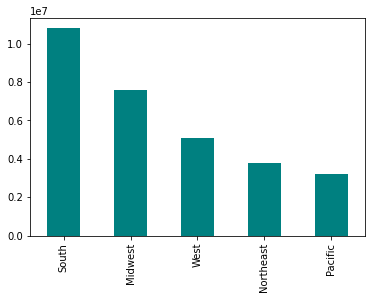

In [12]:
#Bar Chart
df_12['Region'].value_counts().plot.bar(color=['teal'])

In [13]:
#find average and sum of each reason by using the group function
region_avg = df_12.groupby(['Region'],as_index=False).prices.mean()
print(region_avg)

      Region     prices
0    Midwest  12.715483
1  Northeast  12.109287
2    Pacific  11.259761
3      South  12.195577
4       West  11.357781


In [14]:
df_12['Counts'] = df_12.groupby(['user_id'])['user_id'].transform('count')

In [15]:
#figure out customer include and exclude

In [16]:
df_12.loc[(df_12['Counts']<=5),'Customer_Exclusion'] = 'exclude'

In [17]:
df_12.loc[(df_12['Counts']>5),'Customer_Exclusion'] = 'include'

In [18]:
placeholder = df_12.groupby(df_12.Customer_Exclusion)

In [19]:
df_13 = placeholder.get_group('include')

In [31]:
df_13.head()

,order_id,user_id,order_hour_of_day,Unnamed: 0,department_id,prices,average_spending,Spending_Flag,Gender,STATE,Age,Number_of_Dependants,Marital_Status,income,Region,Counts,Customer_Exclusion,Parent
0,2539329,1,8,195,7,9.0,6.367797,low_spender,Female,Alabama,31,3,married,40423,South,59,include,yes
1,2398795,1,7,195,7,9.0,6.367797,low_spender,Female,Alabama,31,3,married,40423,South,59,include,yes
2,473747,1,12,195,7,9.0,6.367797,low_spender,Female,Alabama,31,3,married,40423,South,59,include,yes
3,2254736,1,7,195,7,9.0,6.367797,low_spender,Female,Alabama,31,3,married,40423,South,59,include,yes
4,431534,1,15,195,7,9.0,6.367797,low_spender,Female,Alabama,31,3,married,40423,South,59,include,yes


In [35]:
parent_counts = df_13['Parent'].value_counts()
parent_counts

yes    24302661
no      8095929
Name: Parent, dtype: int64

In [38]:
Marital_Status_count = df_13['Marital_Status'].value_counts()
Marital_Status_count

married                             22752378
single                               5324657
divorced/widowed                     2771272
living with parents and siblings     1550283
Name: Marital_Status, dtype: int64

In [22]:
df_13.to_pickle(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\02 Data\\\\\\\\\\\\\\\\Original Data\\\\\\\\\\\\\\\\df_13.pkl')

CHECKPOINT!
Continue working with df_13 - but it has been exported to pickle format should you need to start over

In [25]:
df_14 = pd.read_pickle(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\02 Data\\\\\\\\\\\\\\\\Original Data\\\\\\\\\\\\\\\\df_13.pkl')

In [26]:
#df_13 - create a parent flag yes/no
df_14.loc[(df_14['Number_of_Dependants']>0),'Parent'] = 'yes'

In [27]:
#df_13 - create a parent flag yes/no
df_14.loc[(df_14['Number_of_Dependants']<1),'Parent'] = 'no'

In [43]:
Profile_Averages = df_14.groupby(['Region','Parent','Marital_Status'],as_index=False).prices.mean()
print(Profile_Averages)

       Region Parent                    Marital_Status     prices
0     Midwest     no                  divorced/widowed   9.784448
1     Midwest     no                            single  14.813399
2     Midwest    yes  living with parents and siblings   9.196079
3     Midwest    yes                           married  12.800087
4   Northeast     no                  divorced/widowed  14.432419
5   Northeast     no                            single  11.772311
6   Northeast    yes  living with parents and siblings   9.213616
7   Northeast    yes                           married  12.083576
8     Pacific     no                  divorced/widowed  10.016144
9     Pacific     no                            single  10.135418
10    Pacific    yes  living with parents and siblings   9.126371
11    Pacific    yes                           married  11.815248
12      South     no                  divorced/widowed  11.920710
13      South     no                            single  13.166381
14      So

In [44]:
Profile_Sum = df_14.groupby(['Region','Parent','Marital_Status'],as_index=False).prices.sum()
print(Profile_Averages)

       Region Parent                    Marital_Status     prices
0     Midwest     no                  divorced/widowed   9.784448
1     Midwest     no                            single  14.813399
2     Midwest    yes  living with parents and siblings   9.196079
3     Midwest    yes                           married  12.800087
4   Northeast     no                  divorced/widowed  14.432419
5   Northeast     no                            single  11.772311
6   Northeast    yes  living with parents and siblings   9.213616
7   Northeast    yes                           married  12.083576
8     Pacific     no                  divorced/widowed  10.016144
9     Pacific     no                            single  10.135418
10    Pacific    yes  living with parents and siblings   9.126371
11    Pacific    yes                           married  11.815248
12      South     no                  divorced/widowed  11.920710
13      South     no                            single  13.166381
14      So

In [45]:
Profile_Sum.to_csv(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\02 Data\\\\\\\\\\\\\\\\Original Data\\\\\\\\\\\\\\\\Profile_Sum.csv')

In [46]:
Profile_Averages.to_csv(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\02 Data\\\\\\\\\\\\\\\\Original Data\\\\\\\\\\\\\\\\Profile_Averages.csv')

In [47]:
Region_Sum = df_14.groupby(['Region','Gender'],as_index=False).prices.sum()
print(Profile_Averages)

       Region Parent                    Marital_Status     prices
0     Midwest     no                  divorced/widowed   9.784448
1     Midwest     no                            single  14.813399
2     Midwest    yes  living with parents and siblings   9.196079
3     Midwest    yes                           married  12.800087
4   Northeast     no                  divorced/widowed  14.432419
5   Northeast     no                            single  11.772311
6   Northeast    yes  living with parents and siblings   9.213616
7   Northeast    yes                           married  12.083576
8     Pacific     no                  divorced/widowed  10.016144
9     Pacific     no                            single  10.135418
10    Pacific    yes  living with parents and siblings   9.126371
11    Pacific    yes                           married  11.815248
12      South     no                  divorced/widowed  11.920710
13      South     no                            single  13.166381
14      So

In [48]:
Region_Sum.to_csv(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\02 Data\\\\\\\\\\\\\\\\Original Data\\\\\\\\\\\\\\\\Region_Sum.csv')

In [61]:
counts = df_14.nunique()
counts

order_id                3209792
user_id                  204733
order_hour_of_day            24
Unnamed: 0                49661
department_id                21
prices                      242
average_spending         168339
Spending_Flag                 2
Gender                        2
STATE                        51
Age                          64
Number_of_Dependants          4
Marital_Status                4
income                   107695
Region                        5
Counts                     1700
Customer_Exclusion            1
Parent                        2
dtype: int64